In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

In [361]:
file_path = r'E:\Old D\Projects\First Real Task\producer price index of agricultural products (2015=100).xls'

In [362]:
df = pd.read_excel(
    file_path,
    header=[3, 5],
    # skiprows=1, 
    skipfooter = 4, 
)
#df = pd.read_excel(file_path, skiprows=3, header=0)

In [363]:
df.head()

Unnamed: 0_level_0                             Unnamed: 1_level_0  \
    Grup, madde kodu          GRUP, MADDE ADI - GROUP, PRODUCT NAME   
0                NaN                                            NaN   
1                  A       TARIM, ORMANCILIK VE BALIKÇILIK ÜRÜNLERİ   
2                NaN                                            NaN   
3                 01  Tarım ve avcılık ürünleri ve ilgili hizmetler   
4                NaN                                            NaN   

                                  Unnamed: 2_level_0        2016              \
                                 Group, product name     January    February   
0                                                NaN         NaN         NaN   
1                  Agriculture, forestry and fishing  106.970574  106.025416   
2                                                NaN         NaN         NaN   
3  Products of agriculture, hunting and related s...  107.286338  106.207278   
4                                                NaN         NaN         NaN   

                                                              ...        2023  \
        March      April         May        June        July  ...       March   
0         NaN        NaN         NaN         NaN         NaN  ...         NaN   
1  102.684859  99.798919  100.143798  102.506191  103.531042  ...  823.725044   
2         NaN        NaN         NaN         NaN         NaN  ...         NaN   
3  102.613886  99.586511   99.717564  102.265809  103.273367  ...  826.133967   
4         NaN        NaN         NaN         NaN         NaN  ...         NaN   

                                                                            \
        April         May        June        July      August    September   
0         NaN         NaN         NaN         NaN         NaN          NaN   
1  804.637765  821.837274  855.035714  923.690625  959.060459  1001.899024   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3  805.407347  821.628044  852.059218  920.289163   957.38647  1000.501459   
4         NaN         NaN         NaN         NaN         NaN          NaN   

                                       
      October   November     December  
0         NaN        NaN          NaN  
1  990.619207  981.22233  1043.447843  
2         NaN        NaN          NaN  
3  987.416166  980.29636  1044.462165  
4         NaN        NaN          NaN  

[5 rows x 99 columns]

In [364]:
new_columns = []
for year, month in df.columns:
    if pd.isna(year) or pd.isna(month):
        new_columns.append(None)  # Will remove these later
    elif isinstance(year, (int, float)):
        new_columns.append(f"{int(year)}-{month.strip()}")
    else:
        new_columns.append(month.strip())

df.columns = new_columns

# Step 3: Drop columns where column names are None (NaNs or junk)
df = df.loc[:, df.columns.notna()]

# Step 4: Drop the rows above actual data (keep only data rows starting from index 4)
df = df[1:].reset_index(drop=True)

df = df[df.iloc[:, 0].notna()]  # Keep rows where Group column is not NaN

# Step 4: Reset index if needed
# df.reset_index(drop=True, inplace=True)

In [365]:
df.head()

,"Grup, madde kodu","GRUP, MADDE ADI - GROUP, PRODUCT NAME","Group, product name",2016-January,2016-February,2016-March,2016-April,2016-May,2016-June,2016-July,...,2023-March,2023-April,2023-May,2023-June,2023-July,2023-August,2023-September,2023-October,2023-November,2023-December
0,A,"TARIM, ORMANCILIK VE BALIKÇILIK ÜRÜNLERİ","Agriculture, forestry and fishing",106.970574,106.025416,102.684859,99.798919,100.143798,102.506191,103.531042,...,823.725044,804.637765,821.837274,855.035714,923.690625,959.060459,1001.899024,990.619207,981.22233,1043.447843
2,01,Tarım ve avcılık ürünleri ve ilgili hizmetler,"Products of agriculture, hunting and related s...",107.286338,106.207278,102.613886,99.586511,99.717564,102.265809,103.273367,...,826.133967,805.407347,821.628044,852.059218,920.289163,957.38647,1000.501459,987.416166,980.29636,1044.462165
4,01.1,Tek yıllık (uzun ömürlü olmayan) bitkisel ürünler,Non perennial crops,108.472267,108.129711,102.710493,98.218036,94.62334,98.05227,101.111047,...,798.633715,795.180768,841.423514,881.35882,952.205731,972.811685,1004.675231,961.300503,956.543654,1069.481269
6,01.11,"Tahıllar (pirinç hariç), baklagiller ve yağlı ...","Cereals (except rice), leguminous crops and oi...",102.371586,103.82379,103.22876,102.739708,104.232267,107.678779,108.689784,...,815.77532,820.332446,869.553866,904.773723,935.853445,980.696421,998.311643,979.217267,990.298762,1006.388546
8,01.11.1,Buğday,Wheat,100.846114,102.737821,102.12422,102.150608,103.762987,108.939357,109.027291,...,811.227843,810.761274,870.741231,934.994789,980.308183,1011.720767,998.474096,967.338428,993.383192,1008.008636


In [366]:
df.tail()

,"Grup, madde kodu","GRUP, MADDE ADI - GROUP, PRODUCT NAME","Group, product name",2016-January,2016-February,2016-March,2016-April,2016-May,2016-June,2016-July,...,2023-March,2023-April,2023-May,2023-June,2023-July,2023-August,2023-September,2023-October,2023-November,2023-December
203,02.20.11.00.05,Kağıtlık Odun,Wood for paper,105.647755,104.78857,98.970299,86.709789,96.168024,93.594239,92.695891,...,975.137706,956.31352,1040.707851,1065.366911,1237.865806,1162.79137,1283.965435,1328.376105,1303.291121,1295.149463
204,02.20.11.00.04,Sanayi Odunu,Industrial wood,98.397012,100.258317,97.586958,95.439002,89.183126,93.656629,87.325668,...,921.367647,949.6226,992.960871,895.181567,963.819181,1011.281775,1129.169268,1076.638068,1102.407661,1051.510309
205,02.20.11.00.03,Maden Direği,Mining timber,84.824395,85.783267,86.355666,86.851648,90.083142,87.730765,83.594174,...,956.426299,950.53723,963.843354,976.043898,970.86386,977.553706,1085.377547,1145.398783,1143.760134,1138.714528
206,02.20.14.00.01,Yakacak Odun,Fuel wood,144.720718,140.510117,133.833464,121.403143,118.096608,117.778467,114.312506,...,1100.913621,1297.468955,1245.649442,1522.462694,1741.753747,1752.202731,1702.615972,1816.54071,1403.371335,1986.131441
208,03,BALIK VE DİĞER BALIKÇILIK ÜRÜNLERİ,Fishing products and other fishing products,101.411819,102.577062,105.510062,105.712394,116.475422,114.079137,118.498725,...,644.397068,647.58227,705.528882,798.87191,880.026123,877.426682,866.595072,898.160022,808.355774,829.516156


In [367]:
print(df.isnull().sum().any())
print(df.duplicated().sum())

False
0


In [368]:
df.rename(columns={'Grup, madde kodu': 'Group'}, inplace=True)
df.rename(columns={'Group, product name': 'Group, Product'}, inplace=True)
df.drop(columns=['GRUP, MADDE ADI - GROUP, PRODUCT NAME'], inplace=True)

In [369]:
df.head(5)

,Group,"Group, Product",2016-January,2016-February,2016-March,2016-April,2016-May,2016-June,2016-July,2016-August,...,2023-March,2023-April,2023-May,2023-June,2023-July,2023-August,2023-September,2023-October,2023-November,2023-December
0,A,"Agriculture, forestry and fishing",106.970574,106.025416,102.684859,99.798919,100.143798,102.506191,103.531042,101.96064,...,823.725044,804.637765,821.837274,855.035714,923.690625,959.060459,1001.899024,990.619207,981.22233,1043.447843
2,01,"Products of agriculture, hunting and related s...",107.286338,106.207278,102.613886,99.586511,99.717564,102.265809,103.273367,101.709695,...,826.133967,805.407347,821.628044,852.059218,920.289163,957.38647,1000.501459,987.416166,980.29636,1044.462165
4,01.1,Non perennial crops,108.472267,108.129711,102.710493,98.218036,94.62334,98.05227,101.111047,98.166785,...,798.633715,795.180768,841.423514,881.35882,952.205731,972.811685,1004.675231,961.300503,956.543654,1069.481269
6,01.11,"Cereals (except rice), leguminous crops and oi...",102.371586,103.82379,103.22876,102.739708,104.232267,107.678779,108.689784,109.586733,...,815.77532,820.332446,869.553866,904.773723,935.853445,980.696421,998.311643,979.217267,990.298762,1006.388546
8,01.11.1,Wheat,100.846114,102.737821,102.12422,102.150608,103.762987,108.939357,109.027291,109.579193,...,811.227843,810.761274,870.741231,934.994789,980.308183,1011.720767,998.474096,967.338428,993.383192,1008.008636


In [370]:
df.isnull().sum()

Group             0
Group, Product    0
2016-January      0
2016-February     0
2016-March        0
                 ..
2023-August       0
2023-September    0
2023-October      0
2023-November     0
2023-December     0
Length: 98, dtype: int64

In [371]:
df.duplicated().any()

np.False_

In [372]:
# Melt the data from wide to long format
df_long = pd.melt(
    df,
    id_vars=['Group', 'Group, Product'],
    var_name='Date',
    value_name='Price Index'
)

# Convert the "Date" column to proper datetime format
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%Y-%B', errors='coerce')

# Optional: Sort by date
df_long.sort_values('Date', inplace=True)

In [373]:
df_long.head()

,Group,"Group, Product",Date,Price Index
0,A,"Agriculture, forestry and fishing",2016-01-01,106.970574
92,01.27,Beverage crops,2016-01-01,105.567929
91,01.26.1,Olive,2016-01-01,108.844994
90,01.26.1,Olive,2016-01-01,108.844994
89,01.26,Oleaginous fruits,2016-01-01,108.844994


In [374]:
df_long['Group, Product'].value_counts()


Group, Product
Olive                     192
Apples                    192
Tobacco, unprocessed      192
Wheat                     192
Maize                     192
                         ... 
Pepper (for processed)     96
Pepper (bell)              96
Green pepper               96
Eggplant                   96
Cucumber                   96
Name: count, Length: 119, dtype: int64

In [375]:
df['Group, Product'].isin(['Onion']).any()

np.False_

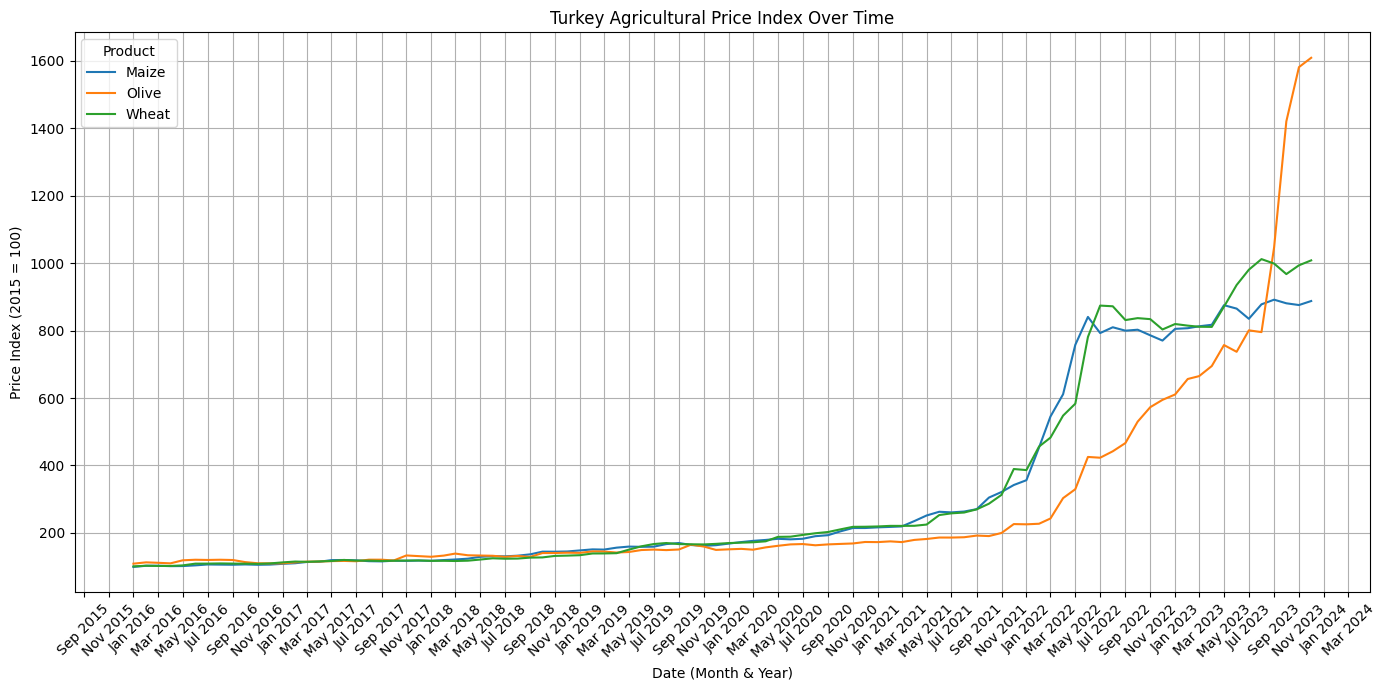

In [376]:
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Define products
products_to_plot = ['Wheat', 'Olive', 'Maize']

# Filter and group
filtered_df = df_long[df_long['Group, Product'].isin(products_to_plot)].dropna(subset=['Price Index'])

daily_prices = (
    filtered_df
    .groupby(['Group, Product', 'Date'])['Price Index']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_prices, x='Date', y='Price Index', hue='Group, Product')

# Format x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.xticks(rotation=45)

plt.title('Turkey Agricultural Price Index Over Time')
plt.xlabel('Date (Month & Year)')
plt.ylabel('Price Index (2015 = 100)')
plt.grid(True)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

# Notes
increase in olives starting from 2022 but it grow massivly statrting from middle of 2023 exactly july 2023

Massive increase in Wheat and Maize starting from  Nov 2022 and stabbled in middle from May 2020 to middle of  Mar 2023 and it started increasing again

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_96940\2292477194.py:7: SyntaxWarning: invalid escape sequence '\d'
  df[col] = df[col].astype(str).str.replace('[^\d.]', '', regex=True)


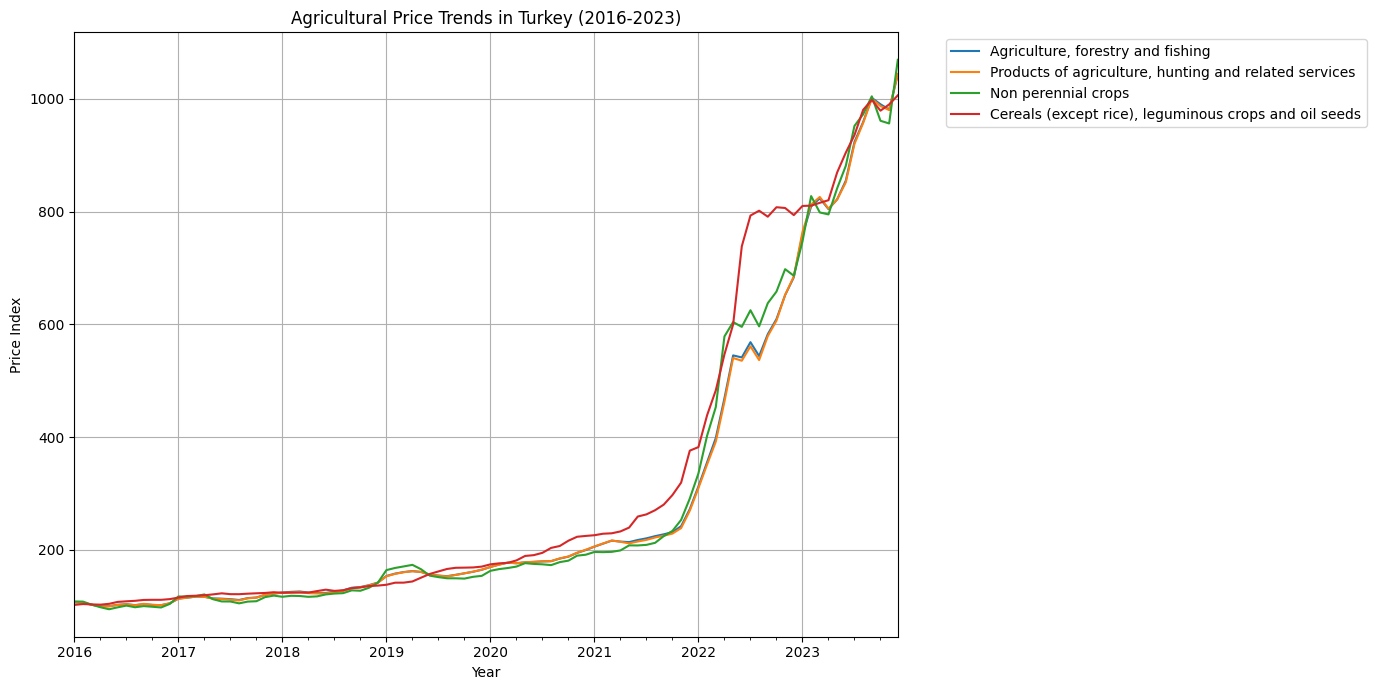

In [377]:
# 1. Clean the column names
df.columns = [col.strip().replace('—', 'NaN') for col in df.columns]

# 2. Convert all numeric columns
for col in df.columns[2:]:
    # Remove any non-numeric characters
    df[col] = df[col].astype(str).str.replace('[^\d.]', '', regex=True)
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Prepare the plot
plt.figure(figsize=(14, 7))

for product in df['Group, Product'].unique()[:4]:  # Plot first 4 products
    product_data = df[df['Group, Product'] == product].iloc[:, 2:]
    dates = [datetime.strptime(col, '%Y-%B') for col in product_data.columns]
    values = product_data.values.flatten()
    
    # Create a Series with proper datetime index
    ts = pd.Series(values, index=pd.to_datetime(dates))
    ts.plot(label=product)

plt.title('Agricultural Price Trends in Turkey (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Turkey Exports

In [378]:
file_path3 = r"E:\Old D\Projects\First Real Task\exports by country and year ( top 20 country in exports).xlsx"

In [379]:
dft = pd.read_excel(
    file_path3,
    header=[3],
    skiprows=1,
    # skipfooter=1,
)


In [380]:
dft.head()

,Rank,Unnamed: 1,2024(r),2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,Country
0,NaN,Toplam,261800269.07,2.556274e+08,2.541697e+08,2.252145e+08,1.696378e+08,180832721.702,1.771688e+08,1.644946e+08,1.492470e+08,1.509821e+08,1.665049e+08,161480914.702,Total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Almanya,20431813.203,2.108335e+07,2.114178e+07,1.931102e+07,1.597870e+07,16617244.223,1.735344e+07,1.635639e+07,1.516495e+07,1.449043e+07,1.627537e+07,14832546.203,Germany
3,2,ABD,16351760.421,1.487965e+07,1.688532e+07,1.472036e+07,1.018297e+07,8970657.918,9.072756e+06,9.259583e+06,7.262306e+06,7.019678e+06,6.921046e+06,6646601.065,USA
4,3,Birleşik Krallık,15291161.468,1.246312e+07,1.300480e+07,1.370369e+07,1.123558e+07,11278615.17,1.147393e+07,9.932539e+06,1.196167e+07,1.082285e+07,1.021648e+07,9126732.663,United Kingdom


In [381]:
dft.tail()

,Rank,Unnamed: 1,2024(r),2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,Country
80,19,Fas,12.479364,-1.090300,3.936806,44.708779,-12.364831,15.278218,20.725988,13.217578,8.631945,-5.257416,10.455476,-,Morocco
81,20,Çin,2.490388,0.754213,-10.413290,27.805977,5.127819,-11.452012,1.348702,27.711872,-4.882013,-15.822051,-20.902268,-,China
82,NaN,Diğerleri,-1.709524,-1.872948,15.867163,35.466155,-6.179524,3.52937,15.033350,3.657790,-5.520882,-8.434439,5.017119,-,Others
83,(r) Revize edilmiştir.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,(r) Data revised.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
dft.drop(columns=['Rank'], inplace=True)
dft.drop(columns=['Unnamed: 1'], inplace=True)
dft.rename(columns={'2024(r)': 2024}, inplace=True)
dft.drop(index=[1], inplace=True)

In [383]:
dft.head()

,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,Country
0,261800269.07,2.556274e+08,2.541697e+08,2.252145e+08,1.696378e+08,180832721.702,1.771688e+08,1.644946e+08,1.492470e+08,1.509821e+08,1.665049e+08,161480914.702,Total
2,20431813.203,2.108335e+07,2.114178e+07,1.931102e+07,1.597870e+07,16617244.223,1.735344e+07,1.635639e+07,1.516495e+07,1.449043e+07,1.627537e+07,14832546.203,Germany
3,16351760.421,1.487965e+07,1.688532e+07,1.472036e+07,1.018297e+07,8970657.918,9.072756e+06,9.259583e+06,7.262306e+06,7.019678e+06,6.921046e+06,6646601.065,USA
4,15291161.468,1.246312e+07,1.300480e+07,1.370369e+07,1.123558e+07,11278615.17,1.147393e+07,9.932539e+06,1.196167e+07,1.082285e+07,1.021648e+07,9126732.663,United Kingdom
5,13005918.839,1.275936e+07,1.375028e+07,1.112565e+07,9.142047e+06,10223292.27,9.437007e+06,1.010983e+07,8.496076e+06,9.966655e+06,1.315413e+07,12949890.577,Iraq


In [384]:
dft[2024] = pd.to_numeric(dft[2024], errors='coerce')
dft[2023] = pd.to_numeric(dft[2023], errors='coerce')
dft[2022] = pd.to_numeric(dft[2022], errors='coerce')
dft[2021] = pd.to_numeric(dft[2021], errors='coerce')
dft[2020] = pd.to_numeric(dft[2020], errors='coerce')
dft[2019] = pd.to_numeric(dft[2019], errors='coerce')
dft[2018] = pd.to_numeric(dft[2018], errors='coerce')
dft[2017] = pd.to_numeric(dft[2017], errors='coerce')
dft[2016] = pd.to_numeric(dft[2016], errors='coerce')
dft[2015] = pd.to_numeric(dft[2015], errors='coerce')
dft[2014] = pd.to_numeric(dft[2014], errors='coerce')
dft[2013] = pd.to_numeric(dft[2013], errors='coerce')

In [385]:
dft.isnull().sum()
dft.duplicated().any()

np.True_

In [386]:
dft.dropna(inplace=True)
dft.drop_duplicates(inplace=True)

In [387]:
country_col = dft.pop("Country")
dft.insert(0, "Country", country_col)
dft.reset_index(drop=True, inplace=True)

# Now Country is the very first column
dft.head()

,Country,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Total,2.618003e+08,2.556274e+08,2.541697e+08,2.252145e+08,1.696378e+08,1.808327e+08,1.771688e+08,1.644946e+08,1.492470e+08,1.509821e+08,1.665049e+08,1.614809e+08
1,Germany,2.043181e+07,2.108335e+07,2.114178e+07,1.931102e+07,1.597870e+07,1.661724e+07,1.735344e+07,1.635639e+07,1.516495e+07,1.449043e+07,1.627537e+07,1.483255e+07
2,USA,1.635176e+07,1.487965e+07,1.688532e+07,1.472036e+07,1.018297e+07,8.970658e+06,9.072756e+06,9.259583e+06,7.262306e+06,7.019678e+06,6.921046e+06,6.646601e+06
3,United Kingdom,1.529116e+07,1.246312e+07,1.300480e+07,1.370369e+07,1.123558e+07,1.127862e+07,1.147393e+07,9.932539e+06,1.196167e+07,1.082285e+07,1.021648e+07,9.126733e+06
4,Iraq,1.300592e+07,1.275936e+07,1.375028e+07,1.112565e+07,9.142047e+06,1.022329e+07,9.437007e+06,1.010983e+07,8.496076e+06,9.966655e+06,1.315413e+07,1.294989e+07


In [388]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  44 non-null     object 
 1   2024     44 non-null     float64
 2   2023     44 non-null     float64
 3   2022     44 non-null     float64
 4   2021     44 non-null     float64
 5   2020     44 non-null     float64
 6   2019     44 non-null     float64
 7   2018     44 non-null     float64
 8   2017     44 non-null     float64
 9   2016     44 non-null     float64
 10  2015     44 non-null     float64
 11  2014     44 non-null     float64
 12  2013     44 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.6+ KB


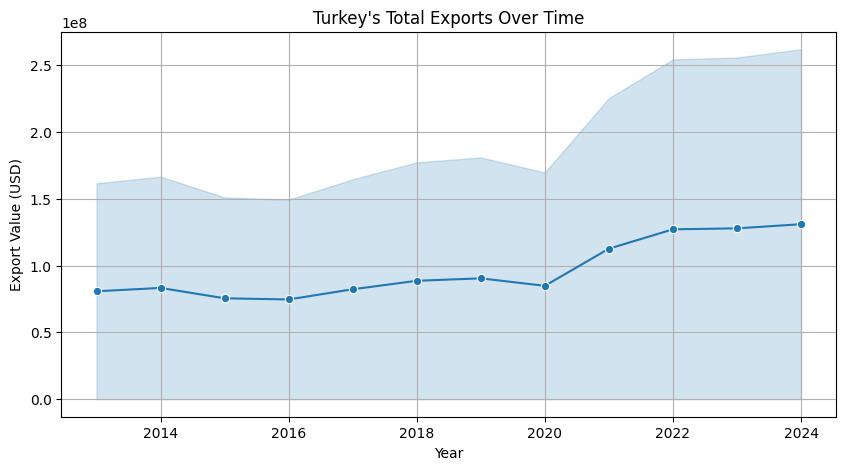

In [389]:
# Plot Total export trend
total_exports = dft[dft['Country'] == 'Total'].melt(id_vars='Country', var_name='Year', value_name='ExportValue')
total_exports['Year'] = total_exports['Year'].astype(int)

plt.figure(figsize=(10, 5))
sns.lineplot(data=total_exports, x='Year', y='ExportValue', marker='o')
plt.title("Turkey's Total Exports Over Time")
plt.ylabel("Export Value (USD)")
plt.grid(True)
plt.show()


# Turkey’s top customers in the most recent year

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_96940\2053300158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_2024, y='Country', x=2024, palette='viridis')


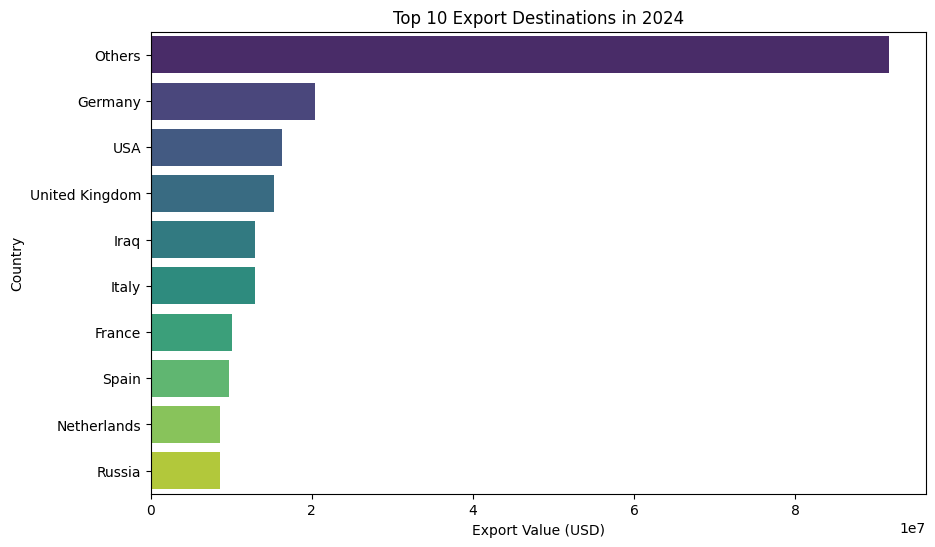

In [390]:
# Filter out Total and plot top countries for 2024
top_2024 = dft[dft['Country'] != 'Total'][['Country', 2024]]
top_2024 = top_2024.sort_values(2024, ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_2024, y='Country', x=2024, palette='viridis')
plt.title("Top 10 Export Destinations in 2024")
plt.xlabel("Export Value (USD)")
plt.show()


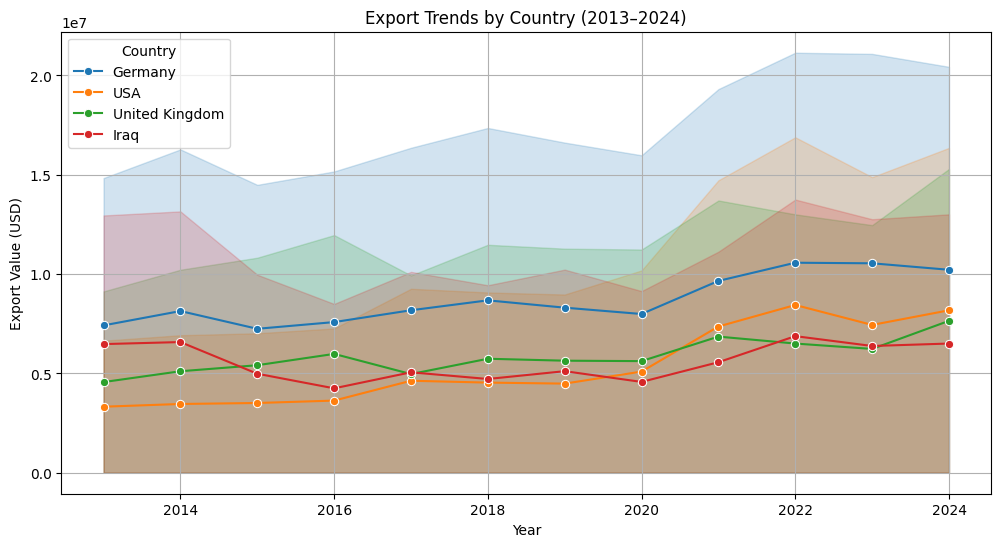

In [391]:
# Select countries and melt for line plot
countries = ['Germany', 'USA', 'United Kingdom', 'Iraq']
subset = dft[dft['Country'].isin(countries)].melt(id_vars='Country', var_name='Year', value_name='ExportValue')
subset['Year'] = subset['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Year', y='ExportValue', hue='Country', marker='o')
plt.title("Export Trends by Country (2013–2024)")
plt.ylabel("Export Value (USD)")
plt.grid(True)
plt.show()


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_96940\1249272615.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_growth, x='Country', y='Growth (%)', palette='coolwarm')


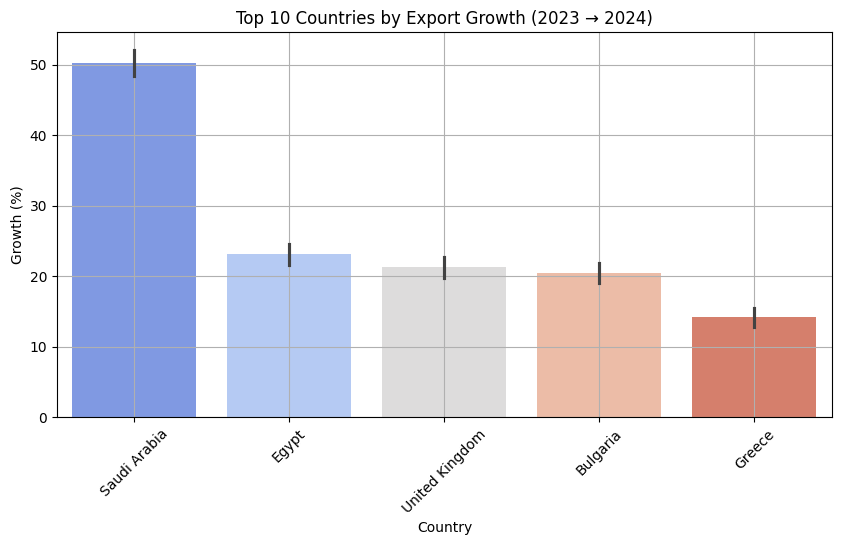

In [392]:
# Calculate growth rate
df_growth = dft[dft['Country'] != 'Total'].copy()
df_growth['Growth (%)'] = ((df_growth[2024] - df_growth[2023]) / df_growth[2023]) * 100
df_growth = df_growth.sort_values('Growth (%)', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_growth, x='Country', y='Growth (%)', palette='coolwarm')
plt.title("Top 10 Countries by Export Growth (2023 → 2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# INDIA

Producing Prices

In [393]:
# Load the dataset
dfi = pd.read_csv(r'E:\Old D\Projects\First Real Task\Agriculture Commodity Price Datasets for India\agridata_csv_202110311352.csv') 

In [394]:
dfi.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22


In [395]:
dfi.isnull().sum()

commodity_name    1
state             0
district          0
market            0
min_price         1
max_price         1
modal_price       1
date              1
dtype: int64

In [396]:
dfi.dropna(inplace=True)

In [397]:
dfi.duplicated().sum()

np.int64(120)

In [398]:
dfi.drop_duplicates(inplace=True)

In [399]:
dfi.duplicated().any()

np.False_

In [400]:
dfi['commodity_name'].isin(['Olive']).any()

np.False_

In [401]:
# Step 1: Filter for selected commodities
selected = ['Onion', 'Maize', 'Wheat']
dfi_filtered = dfi[dfi['commodity_name'].isin(selected)].copy()

# Step 2: Parse the date column
dfi_filtered['date'] = pd.to_datetime(dfi_filtered['date'], errors='coerce')

# Step 3: Drop duplicate rows
dfi_filtered.drop_duplicates(inplace=True)

# Step 4: Check and handle missing values (optional drop or fill)
dfi_filtered.dropna(subset=['date', 'min_price', 'max_price', 'modal_price'], inplace=True)

# Step 5: Rename columns for consistency
dfi_filtered.rename(columns={
    'commodity_name': 'commodity',
    'min_price': 'min_inr',
    'max_price': 'max_inr',
    'modal_price': 'modal_inr'
}, inplace=True)

# Step 6: Convert prices from INR/quintal to USD/ton
# 1 quintal = 0.1 ton => multiply by 10 to get per ton
# Approximate exchange rate
inr_to_usd = 85.40

dfi_filtered['min_usd_per_ton'] = (dfi_filtered['min_inr'] * 10) / inr_to_usd
dfi_filtered['max_usd_per_ton'] = (dfi_filtered['max_inr'] * 10) / inr_to_usd
dfi_filtered['modal_usd_per_ton'] = (dfi_filtered['modal_inr'] * 10) / inr_to_usd

# Optional: Save cleaned data to CSV
dfi_filtered.to_csv('cleaned_agri_data_india.csv', index=False)

# View result
dfi_filtered.head()

,commodity,state,district,market,min_inr,max_inr,modal_inr,date,min_usd_per_ton,max_usd_per_ton,modal_usd_per_ton
4205,Maize,Andhra Pradesh,Kurnool,Kurnool,10.0,17.0,10.0,2019-05-22,1.170960,1.990632,1.170960
4206,Maize,Assam,Sonitpur,Dhekiajuli,17.0,18.0,18.0,2019-05-22,1.990632,2.107728,2.107728
4207,Maize,Assam,Nagaon,Dhing,14.0,16.0,15.5,2019-05-22,1.639344,1.873536,1.814988
4208,Maize,Chattisgarh,Raigarh,Gharghoda,17.1,17.1,17.1,2019-05-22,2.002342,2.002342,2.002342
4209,Maize,Chattisgarh,Jashpur,Jaspur,17.0,17.0,17.0,2019-05-22,1.990632,1.990632,1.990632


In [402]:
dfi_filtered['commodity'].unique()

array(['Maize', 'Onion', 'Wheat'], dtype=object)

In [403]:
dfi_filtered['district'].value_counts()

district
Nashik          3279
Ahmednagar      1810
Jalgaon         1401
Rajkot          1378
Bulandshahar    1328
                ... 
Pulwama            1
Dimapur            1
Pondicherry        1
Theni              1
Katni              1
Name: count, Length: 426, dtype: int64

In [404]:
dfi_filtered['date'].unique()

<DatetimeArray>
['2019-05-22 00:00:00', '2019-05-23 00:00:00', '2019-05-24 00:00:00',
 '2019-05-25 00:00:00', '2019-05-27 00:00:00', '2019-05-28 00:00:00',
 '2019-05-26 00:00:00', '2019-05-29 00:00:00', '2019-05-30 00:00:00',
 '2019-06-12 00:00:00',
 ...
 '2021-06-20 00:00:00', '2021-06-17 00:00:00', '2021-07-14 00:00:00',
 '2021-08-03 00:00:00', '2021-06-02 00:00:00', '2021-06-12 00:00:00',
 '2021-07-24 00:00:00', '2021-06-13 00:00:00', '2021-07-28 00:00:00',
 '2021-07-16 00:00:00']
Length: 337, dtype: datetime64[ns]

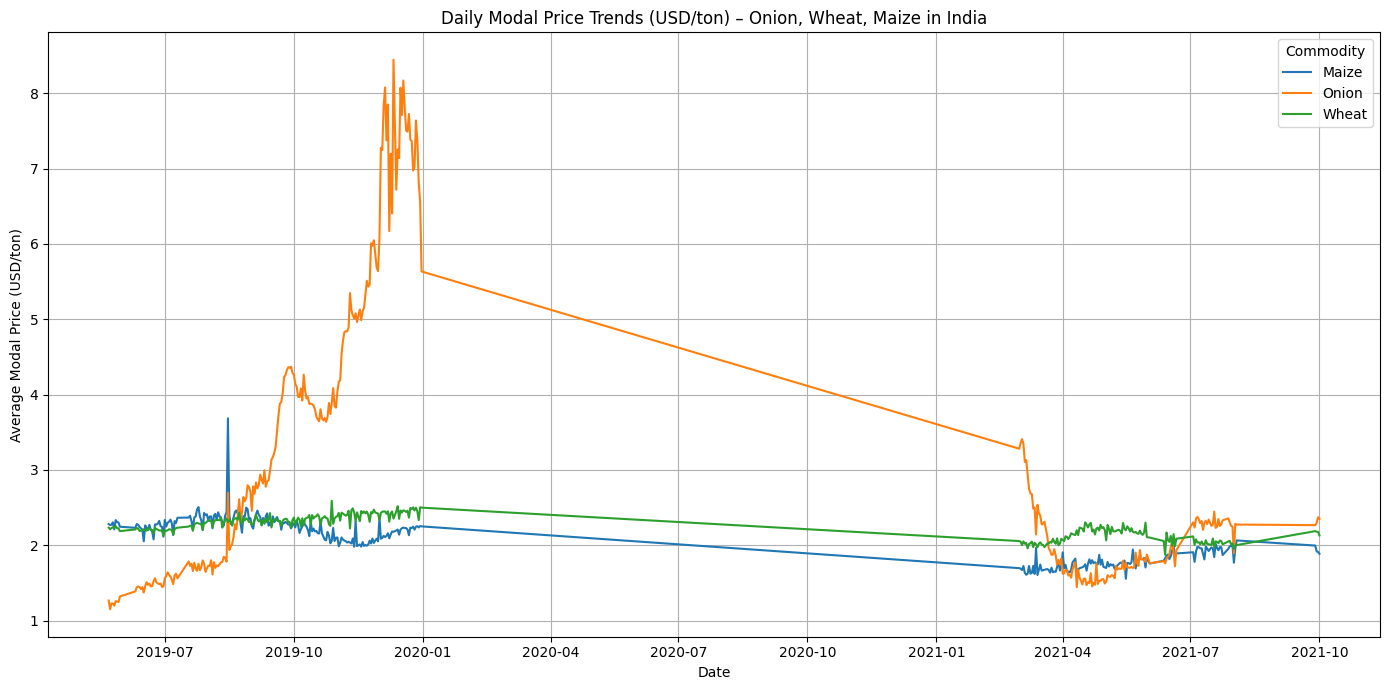

In [405]:
dfi_filtered['date'] = pd.to_datetime(dfi_filtered['date'])

# Filter for selected commodities
commodities = ['Onion', 'Wheat', 'Maize']
filtered_df = dfi_filtered[dfi_filtered['commodity'].isin(commodities)]

# Group by commodity and date, then calculate average modal price per day
daily_prices = (
    filtered_df
    .groupby(['commodity', 'date'])['modal_usd_per_ton']
    .mean()
    .reset_index()
)

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_prices, x='date', y='modal_usd_per_ton', hue='commodity')

plt.title('Daily Modal Price Trends (USD/ton) – Onion, Wheat, Maize in India')
plt.xlabel('Date')
plt.ylabel('Average Modal Price (USD/ton)')
plt.grid(True)
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

# India's Export Data

In [406]:
file_path2 = r"E:\Old D\Projects\First Real Task\India Exports\IndiaExportApedaProductReport.xls.xlsx"

In [407]:
dfe = pd.read_excel(
    file_path2,
    header=[1],
    skiprows=3,
    skipfooter=1,
)

In [408]:
dfe.head()

,Unnamed: 0,Value In USD Million,Qty In MT
0,Products,2024-25 (April-January),2024-25 (April-January)
1,Total,23153.22,26486289.85
2,Non Basmati Rice,5227.03,11177762.62
3,Basmati Rice,4873.29,4837592.95
4,Buffalo Meat,3332.63,1040061.24


In [409]:
dfe.tail()

,Unnamed: 0,Value In USD Million,Qty In MT
39,Cardanol,5.33,6212.42
40,Other Oil Cake/Solid Resdus,2.99,13690.22
41,Wheat,1.47,2474.64
42,Processed Meat,0.96,196.82
43,Cashewnut Shell Liquid,0.73,881.7


In [410]:
dfe.isnull().sum()

Unnamed: 0              0
Value In USD Million    0
Qty In MT               0
dtype: int64

In [411]:
dfe.duplicated().any()

np.False_

In [412]:
dfe.rename(columns={'Unnamed: 0': 'Products'}, inplace=True)
dfe.drop(index = [0,1] , inplace = True)
dfe.reset_index(drop=True, inplace=True)

In [413]:
dfe.head()

,Products,Value In USD Million,Qty In MT
0,Non Basmati Rice,5227.03,11177762.62
1,Basmati Rice,4873.29,4837592.95
2,Buffalo Meat,3332.63,1040061.24
3,Miscellaneous Preparations,1239.23,881439.76
4,Cereal Preparations,774.1,493210.94


In [414]:
dfe['Unit Price'] = (dfe['Value In USD Million'] * 1000000 ) / dfe['Qty In MT'] 

In [415]:
dfe.head()

,Products,Value In USD Million,Qty In MT,Unit Price
0,Non Basmati Rice,5227.03,11177762.62,467.627573
1,Basmati Rice,4873.29,4837592.95,1007.379093
2,Buffalo Meat,3332.63,1040061.24,3204.263241
3,Miscellaneous Preparations,1239.23,881439.76,1405.915703
4,Cereal Preparations,774.1,493210.94,1569.511009


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_96940\243378184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfe, x='Value In USD Million', y='Products', palette='Blues_d')


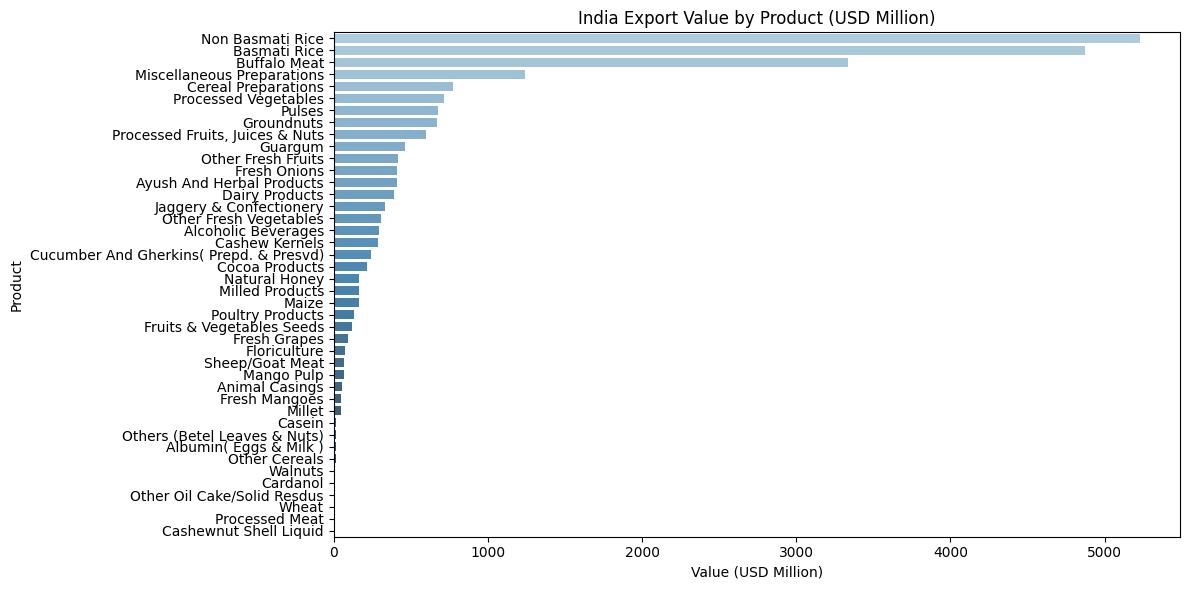

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_96940\243378184.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfe, x='Qty In MT', y='Products', palette='Greens_d')


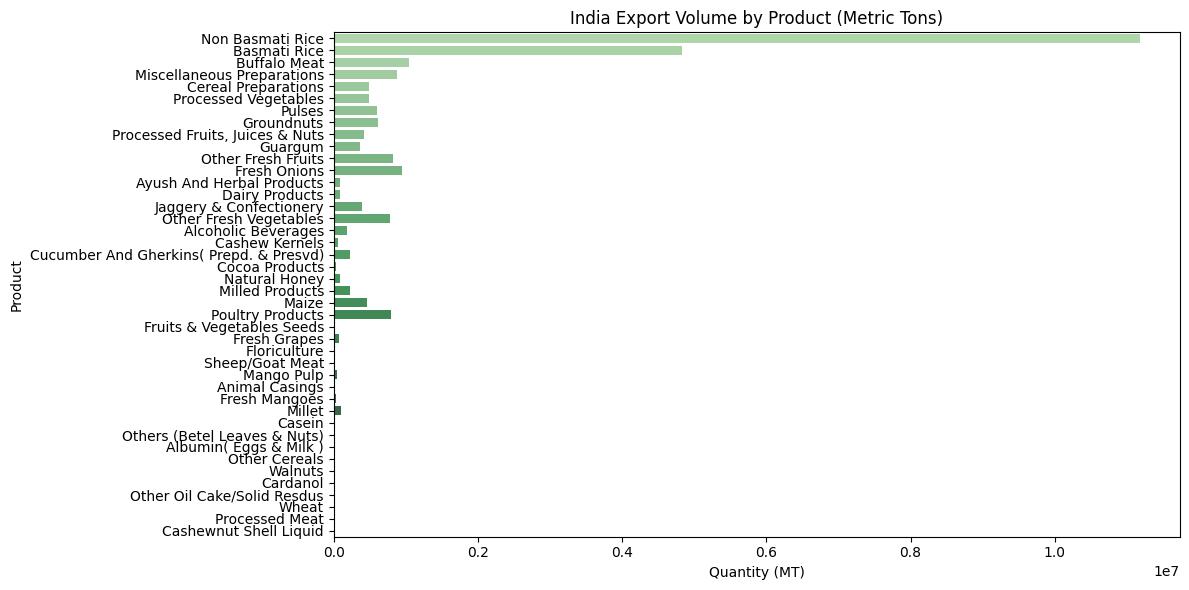

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_96940\243378184.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfe, x='Unit Price', y='Products', palette='Oranges_d')


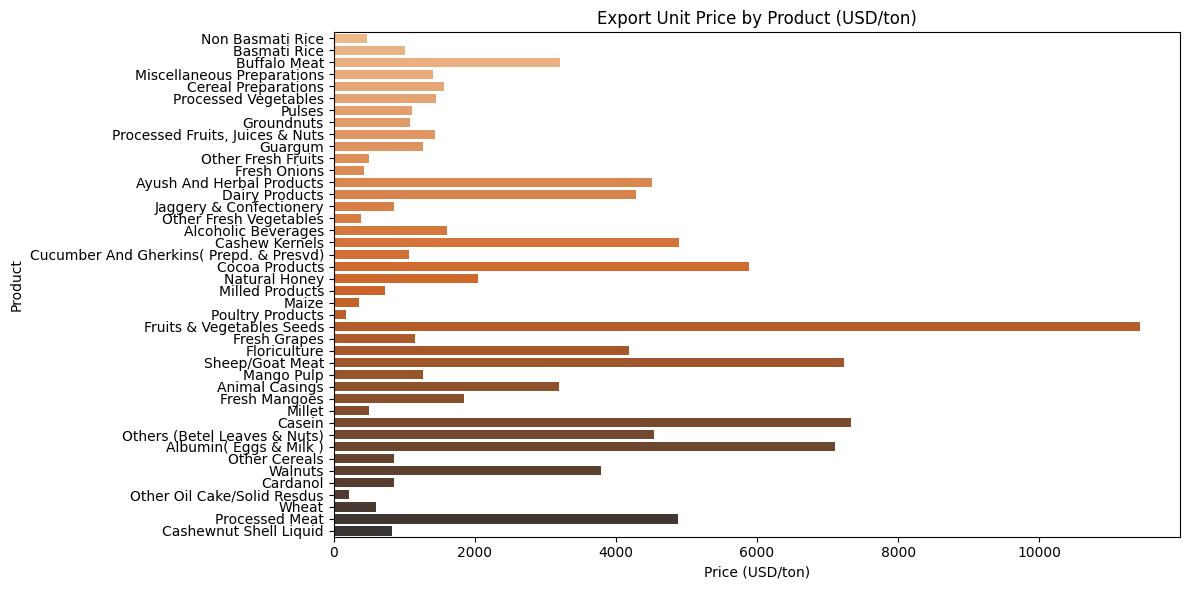

In [416]:
# Bar plot: Export Value
plt.figure(figsize=(12, 6))
sns.barplot(data=dfe, x='Value In USD Million', y='Products', palette='Blues_d')
plt.title('India Export Value by Product (USD Million)')
plt.xlabel('Value (USD Million)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Bar plot: Export Volume
plt.figure(figsize=(12, 6))
sns.barplot(data=dfe, x='Qty In MT', y='Products', palette='Greens_d')
plt.title('India Export Volume by Product (Metric Tons)')
plt.xlabel('Quantity (MT)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Bar plot: Unit Price
plt.figure(figsize=(12, 6))
sns.barplot(data=dfe, x='Unit Price', y='Products', palette='Oranges_d')
plt.title('Export Unit Price by Product (USD/ton)')
plt.xlabel('Price (USD/ton)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()